# Import Libraries

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import math

# Load Data

### Import Load Data Functions

In [2]:
from LoadData import *

### Load Data and Preprocess

In [3]:
# load images
train_images_a, train_labels_a = load_data('training-a', 'training-a.csv')
train_images_a, train_labels_a = preprocess_data(train_images_a, train_labels_a)

train_images_b, train_labels_b = load_data('training-b', 'training-b.csv')
train_images_b, train_labels_b = preprocess_data(train_images_b, train_labels_b)

train_images_c, train_labels_c = load_data('training-c', 'training-c.csv')
train_images_c, train_labels_c = preprocess_data(train_images_c, train_labels_c)

train_images = np.concatenate((train_images_a, train_images_b, train_images_c), axis=0)
train_labels = np.concatenate((train_labels_a, train_labels_b, train_labels_c), axis=0)

# train_images, train_labels = load_data('training-a', 'training-a.csv')
# train_images, train_labels = preprocess_data(train_images, train_labels)

# print shapes
print("train_images.shape = ", train_images.shape)
print("train_labels.shape = ", train_labels.shape)
print("train_images[0].shape = ", train_images[0].shape)

train_images.shape =  (44359, 28, 28, 1)
train_labels.shape =  (44359,)
train_images[0].shape =  (28, 28, 1)


### Split data into train and validation

In [4]:
# suffle data
s = np.arange(train_images.shape[0])
np.random.shuffle(s)
train_images = train_images[s]
train_labels = train_labels[s]

# split data into train and validation
train_ratio = 0.8
X_train = train_images[:int(train_ratio*len(train_images))]
y_train = train_labels[:int(train_ratio*len(train_labels))]
X_val = train_images[int(train_ratio*len(train_images)):]
y_val = train_labels[int(train_ratio*len(train_labels)):]

# Model

### Import Layers

In [5]:
from ConvolutionLayer import ConvolutionLayer
from ReLULayer import ReLULayer
from MaxPoolingLayer import MaxPoolingLayer
from FlattenLayer import FlattenLayer
from FullyConnectedLayer import FullyConnectedLayer
from SoftmaxLayer import SoftmaxLayer

### Import Model Class

In [6]:
from Model import Model

### Model Building

In [7]:
# use lenet-5 model
model = Model(10)
model.add(ConvolutionLayer(6, 5, 1, 1))
model.add(ReLULayer())
model.add(MaxPoolingLayer(pool_size=2, stride=2))
model.add(ConvolutionLayer(16, 5, 1, 1))
model.add(ReLULayer())
model.add(MaxPoolingLayer(pool_size=2, stride=2))
model.add(FlattenLayer())
model.add(FullyConnectedLayer(output_size=120))
model.add(ReLULayer())
model.add(FullyConnectedLayer(output_size=84))
model.add(ReLULayer())
model.add(FullyConnectedLayer(output_size=10))
model.add(SoftmaxLayer())

### Train Model

epoch:  0
y_pred (first 10)	:  [7 3 6 4 0 2 1 5 8 1]
y_real (first 10)	:  [4 3 1 6 7 0 4 2 8 9]
Training loss:  2.61419674810494
Training accuracy:  0.2846676247639981
Training f1 score:  0.2825419976069997

y_pred (first 10)	:  [5 0 6 0 4 8 0 3 5 8]
y_real (first 10)	:  [2 0 9 4 4 8 8 3 4 6]
Validation loss:  2.6342425608656446
Validation accuracy:  0.2825743913435528
Validation f1 score:  0.2799305315322761


epoch:  1
y_pred (first 10)	:  [8 6 5 5 8 2 1 0 1 1]
y_real (first 10)	:  [4 3 1 6 7 0 4 2 8 9]
Training loss:  2.422915433820836
Training accuracy:  0.33028996533942007
Training f1 score:  0.3209111023832565

y_pred (first 10)	:  [4 0 6 5 4 8 8 0 6 9]
y_real (first 10)	:  [2 0 9 4 4 8 8 3 4 6]
Validation loss:  2.4712578899909827
Validation accuracy:  0.32326420198376915
Validation f1 score:  0.3142849338831748


epoch:  2
y_pred (first 10)	:  [4 6 5 5 0 8 1 4 1 1]
y_real (first 10)	:  [4 3 1 6 7 0 4 2 8 9]
Training loss:  2.3475638966382055
Training accuracy:  0.33905373798855

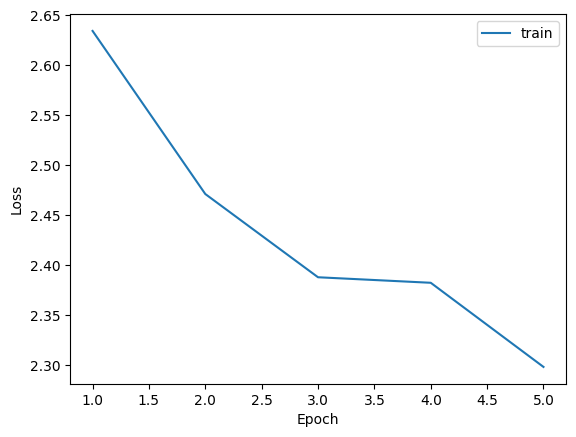

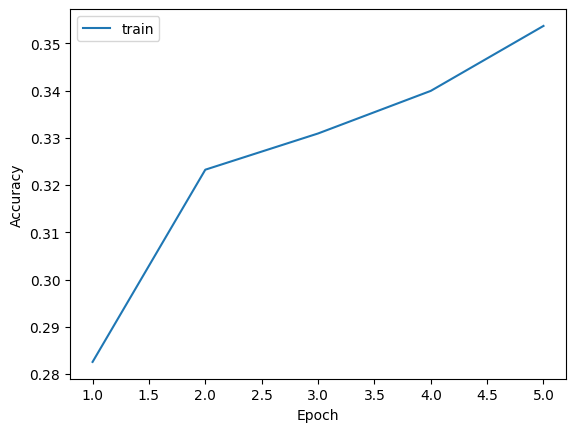

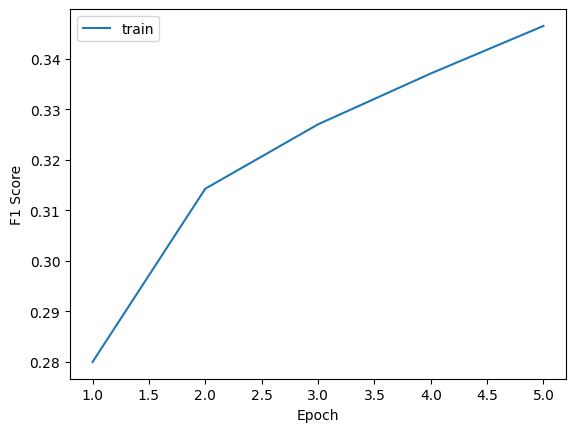

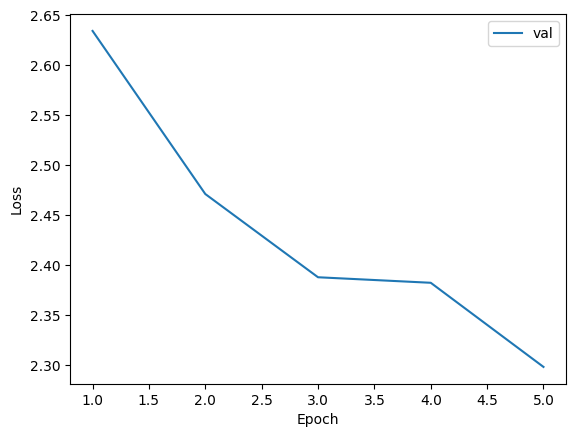

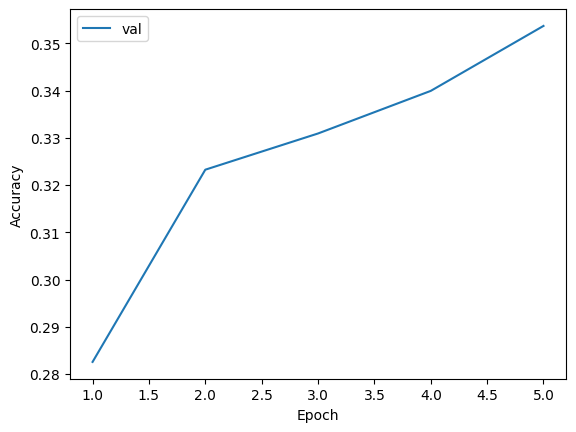

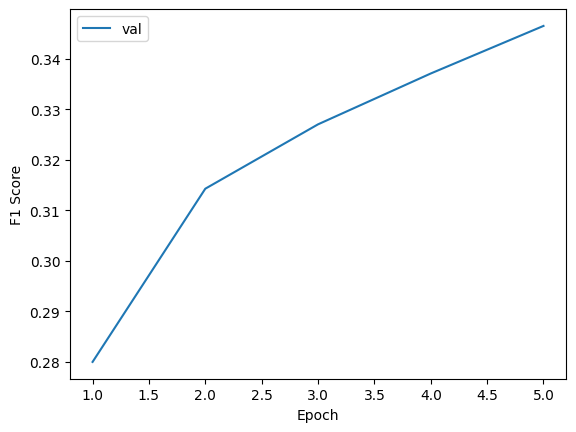

In [8]:
# train
model.train(X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val, learning_rate=0.000001, epochs=5, batch_size=64)

### Save Model

In [9]:
# Save the model using pickle
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model using pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)


## Performace Metrics and Confusion Matrix

### Load Test Data

In [10]:
# load test images
test_images, test_labels = load_data('training-d', 'training-d.csv')
test_images, test_labels = preprocess_data(test_images, test_labels)

### Performance Matrics

In [11]:
# performance metrics and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# predict   
y_pred = model.predict(test_images)

# print performance metrics
print("Accuracy: ", accuracy_score(test_labels, y_pred))
print("Confusion Matrix: ", confusion_matrix(test_labels, y_pred))

# print classification report
print("Classification Report: ", classification_report(test_labels, y_pred))

Accuracy:  0.32123212321232125
Confusion Matrix:  [[363 105 235  74  56  82  42  51  35  64]
 [143 243 316  45  88  40  62  43  30  97]
 [ 64  48 532  61 146  42  30   6  27 151]
 [ 24  16  31 716  86  44 130   6  24  30]
 [ 85 106  45 114 271 102 263  56  48  17]
 [104 150  33  76  36  87 324 163 102  32]
 [ 96  86  68 218  16  48 362  66  64  44]
 [ 72  79  40  59  71  49 138 425  96  46]
 [148  63  61 116  46  60 123  51 381  37]
 [118 157 117  81  62  49 102 119 108 124]]
Classification Report:                precision    recall  f1-score   support

           0       0.30      0.33      0.31      1107
           1       0.23      0.22      0.23      1107
           2       0.36      0.48      0.41      1107
           3       0.46      0.65      0.54      1107
           4       0.31      0.24      0.27      1107
           5       0.14      0.08      0.10      1107
           6       0.23      0.34      0.27      1068
           7       0.43      0.40      0.41      1075
        

### Confustion Matrix

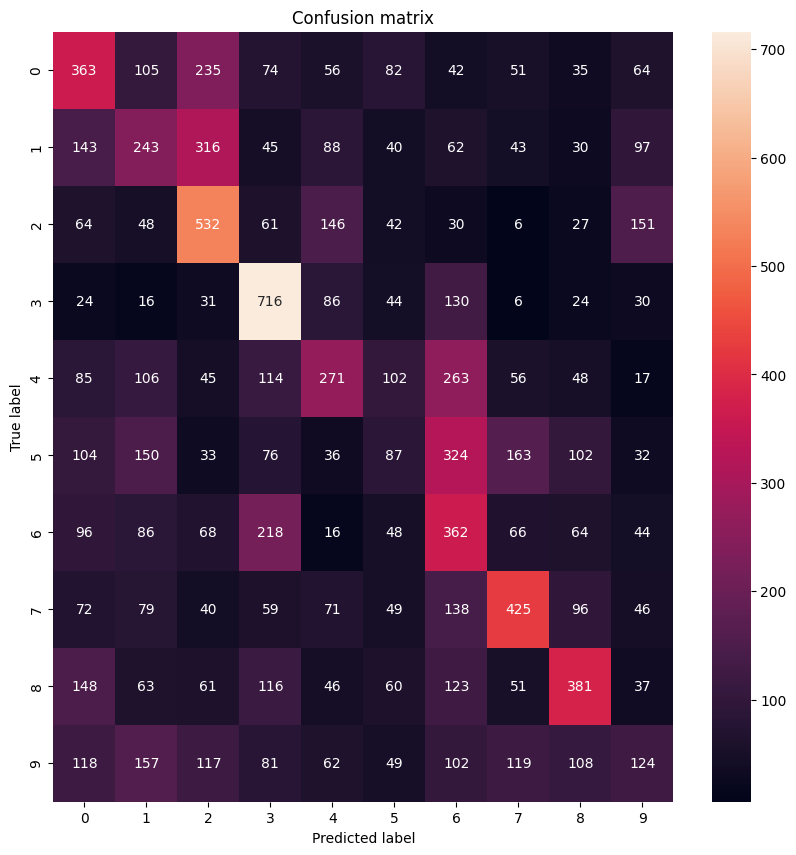

In [12]:
# plot confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()